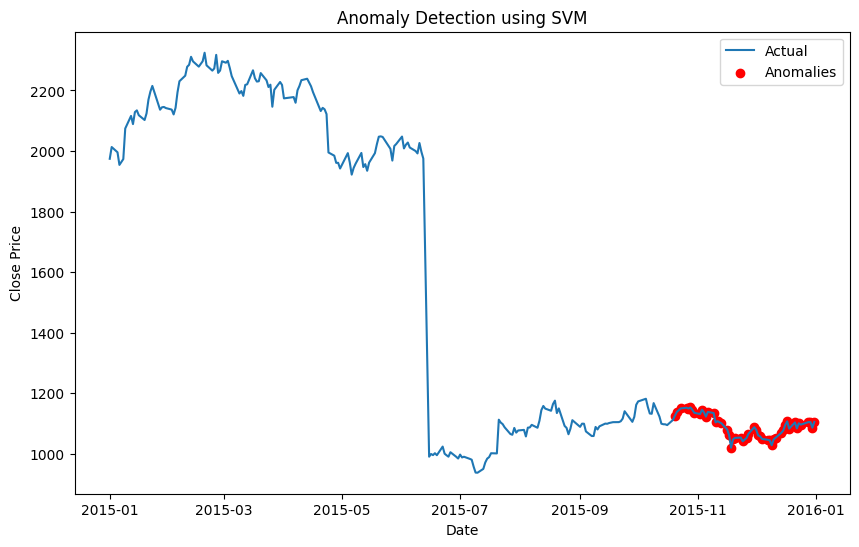

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('infy_stock.csv')

# Assuming the dataset has 'Date' and 'Close' columns
dates = pd.to_datetime(data['Date'])
close_prices = data['Close'].values

# Feature engineering
# In this simple example, we'll use lag features
lags = 5
X = np.zeros((len(close_prices) - lags, lags))
y = np.zeros(len(close_prices) - lags)

for i in range(lags, len(close_prices)):
    X[i - lags, :] = close_prices[i - lags:i]
    # Define binary labels for anomalies (1) and non-anomalies (0) based on some threshold
    if close_prices[i] > close_prices[i - 1]:
        y[i - lags] = 0  # Non-anomaly
    else:
        y[i - lags] = 1  # Anomaly

# Split data into train and test sets
split_ratio = 0.8
split_index = int(len(y) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train SVM model
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_model.fit(X_train, y_train)

# Predictions
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Detect anomalies
anomalies = y_test_pred == 1
anomaly_dates = dates[split_index + lags:][anomalies]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(dates, close_prices, label='Actual')
plt.scatter(anomaly_dates, close_prices[split_index + lags:][anomalies], color='red', marker='o', label='Anomalies')
plt.title('Anomaly Detection using SVM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
